In [1]:
import scanpy as sc
import scvi
import warnings
warnings.filterwarnings("ignore")

# pre-training-data

In [2]:
adata_ref=sc.read_h5ad('/home/dbj/SpaLP/gittest/SpaLP/general/STARmapPLUS/MERFISH_-1.078.h5ad')
adata_ref.var_names_make_unique()
adata_ref.obs['batch']='MERFISH_-1.078'
adata_ref.obs['type']='Pre-training data'

In [3]:
adata_ref

AnnData object with n_obs × n_vars = 45393 × 1122
    obs: 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'assay_ontology_term_id', 'suspension_type', 'cluster_id_transfer', 'subclass_transfer', 'cluster_confidence_score', 'subclass_confidence_score', 'high_quality_transfer', 'major_brain_region', 'ccf_region_name', 'brain_section_label', 'tissue_type', 'is_primary_data', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'slice', 'batch', 'type'
    var: 'gene_name', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'major_brain_region_colors', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_CCF', 'X_spatial_coords', 'X_umap', 'spa

In [4]:
adata_ref.obs['ref_label']=adata_ref.obs['major_brain_region']

In [5]:
%%time
scvi.model.SCVI.setup_anndata(
    adata_ref,
    batch_key="batch",
)

# 2) trin SCVI
vae = scvi.model.SCVI(adata_ref)
vae.train()

# 3) scVI to scANVI
scanvi_ref = scvi.model.SCANVI.from_scvi_model(
    vae,
    labels_key="ref_label",
    unlabeled_category="Unknown",  
)

scanvi_ref.train()
scanvi_ref.save("/home/dbj/SpaLP/gittest/SpaLP/general/MERFISH/Set3/", overwrite=True)

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
You are using a CUDA device ('NVIDIA A800-SXM4-80GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training:   0%|          | 0/176 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=176` reached.


INFO     Training for 10 epochs.                                                                                   


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training:   0%|          | 0/10 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


CPU times: user 14min 40s, sys: 2.19 s, total: 14min 43s
Wall time: 10min 41s


# Query-data

In [6]:
adata1=sc.read_h5ad('/home/dbj/SpaLP/gittest/SpaLP/general/STARmapPLUS/MERFISH_-1.076.h5ad')
adata1.var_names_make_unique()
adata1.obs['batch']='MERFISH_-1.076'
adata1.obs['type']='Inference data'

adata2=sc.read_h5ad('/home/dbj/SpaLP/gittest/SpaLP/general/STARmapPLUS/MERFISH_-1.077.h5ad')
adata2.var_names_make_unique()
adata2.obs['batch']='MERFISH_-1.077'
adata2.obs['type']='Inference data'

adata_list=[adata1,adata2]
adata_query = sc.concat(adata_list, join="inner")
adata_query.obs['type']='Inference data'

In [7]:
adata_query.obs["ref_label"] = "Unknown"

In [8]:
model_q = scvi.model.SCANVI.load_query_data(
    adata_query,
    "/home/dbj/SpaLP/gittest/SpaLP/general/MERFISH/Set3/",
    #labels_key="ref_label",
)
model_q.train(max_epochs=90)

adata_query.obs["predicted_label"] = model_q.predict()

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


INFO     File /home/dbj/SpaLP/gittest/SpaLP/general/MERFISH/Set3/model.pt already downloaded                       
INFO     Training for 90 epochs.                                                                                   


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
💡 Tip: For seamless cloud logging and experiment tracking, try installing [litlogger](https://pypi.org/project/litlogger/) to enable LitLogger, which logs metrics and artifacts automatically to the Lightning Experiments platform.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Training:   0%|          | 0/90 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=90` reached.


# Query data1

In [9]:
adata_query1=adata_query[adata_query.obs['batch']=='MERFISH_-1.076']

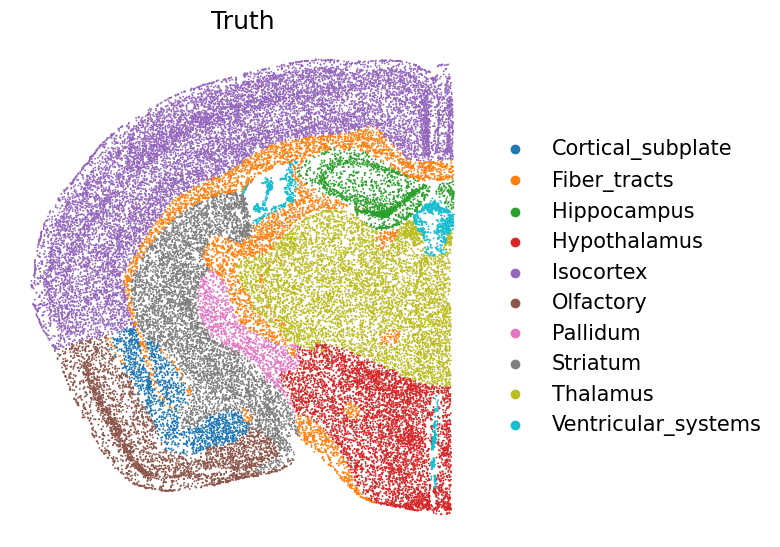

In [10]:
import matplotlib.pyplot as plt
import copy
plt.rcParams['figure.figsize'] = (6,6.5)
plt.rcParams['font.size'] = 15
sc.pl.embedding(adata_query1, basis="spatial",s=7,color=['major_brain_region'],colorbar_loc=None,title='Truth',frameon=False)

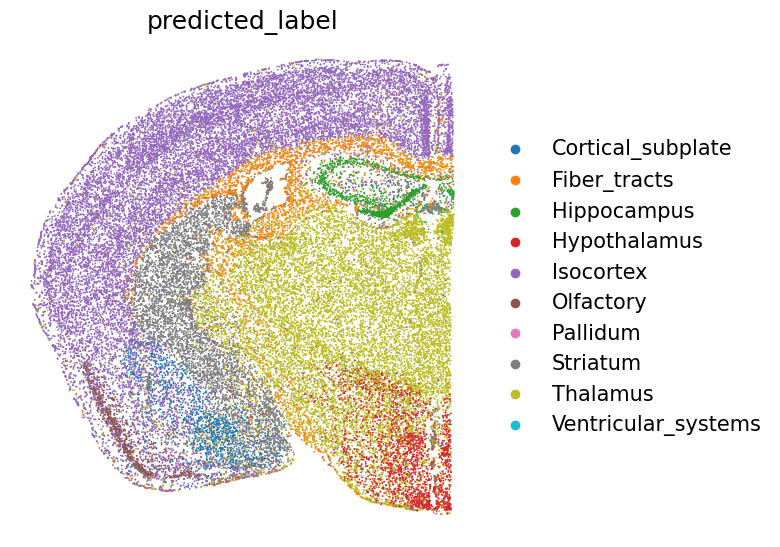

In [11]:
labels = adata_query1.obs["major_brain_region"].cat.categories
colors = adata_query1.uns["major_brain_region_colors"]

color_dict = dict(zip(labels, colors))
import matplotlib.pyplot as plt
import copy
plt.rcParams['figure.figsize'] = (6,6.5)
plt.rcParams['font.size'] = 15
sc.pl.embedding(adata_query1, basis="spatial",s=7,color=['predicted_label'],colorbar_loc=None,title='predicted_label',frameon=False,palette=color_dict)

In [12]:
import numpy as np
from sklearn.metrics import (homogeneity_score,v_measure_score,adjusted_mutual_info_score,normalized_mutual_info_score,adjusted_rand_score,fowlkes_mallows_score)

true_labels = np.array(adata_query1.obs['major_brain_region'])
cluster_labels = np.array(adata_query1.obs['predicted_label'])

nmi = normalized_mutual_info_score(true_labels, cluster_labels)
ari = adjusted_rand_score(true_labels, cluster_labels)

print("ARI:", ari)
print("NMI:", nmi)

ARI: 0.5091105145431921
NMI: 0.5085229300908538


In [13]:
adata_query1.write_h5ad('/home/dbj/SpaLP/gittest/SpaLP/general/MERFISH/Set3/MERFISH_query1.h5ad',compression='gzip')

# Query data2

In [14]:
adata_query2=adata_query[adata_query.obs['batch']=='MERFISH_-1.077']

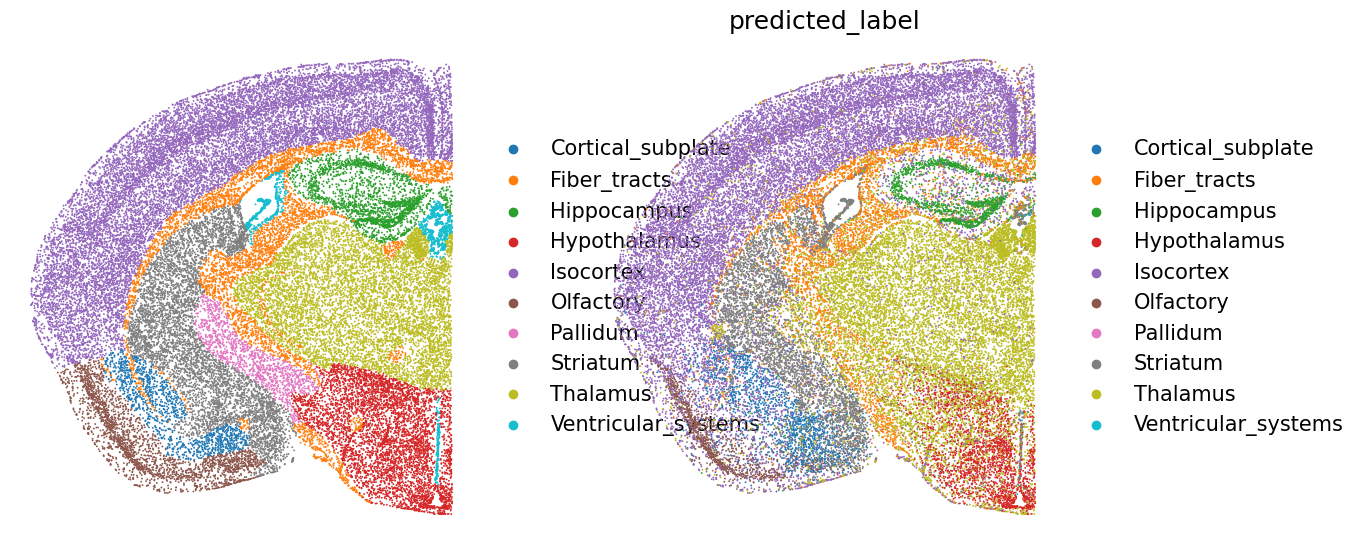

In [15]:
import matplotlib.pyplot as plt
import copy
plt.rcParams['figure.figsize'] = (6,6.5)
plt.rcParams['font.size'] = 15
sc.pl.embedding(adata_query2, basis="spatial",s=7,color=['major_brain_region','predicted_label'],colorbar_loc=None,title='',frameon=False)

In [16]:
import numpy as np
from sklearn.metrics import (homogeneity_score,v_measure_score,adjusted_mutual_info_score,normalized_mutual_info_score,adjusted_rand_score,fowlkes_mallows_score)

true_labels = np.array(adata_query2.obs['major_brain_region'])
cluster_labels = np.array(adata_query2.obs['predicted_label'])

nmi = normalized_mutual_info_score(true_labels, cluster_labels)
ari = adjusted_rand_score(true_labels, cluster_labels)

print("ARI:", ari)
print("NMI:", nmi)

ARI: 0.5247688310556392
NMI: 0.4864770429886713


In [17]:
adata_query2.write_h5ad('/home/dbj/SpaLP/gittest/SpaLP/general/MERFISH/Set3/MERFISH_query2.h5ad',compression='gzip')